In [2]:
import pandas as pd
df = pd.read_csv("AqSolDB.csv")

In [3]:
data = df.to_numpy()

In [29]:
import numpy as np
x = data[:,9:].astype(np.float32)
y = data[:,5].astype(np.float32)

In [30]:
n = len(x)
n1 = int(n*0.7)
n2 = int(n*0.85)
x_train, x_val, x_test = x[:n1], x[n1:n2], x[n2:]
y_train, y_val, y_test = y[:n1], y[n1:n2], y[n2:]

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential()
model.add(Input(shape=(17,)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Sequential()
model.add(Input(shape=(17,)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['mean_absolute_error'])
h1 = model.fit(x_train, y_train,
  validation_data=(x_val,y_val), epochs=20, verbose=0)

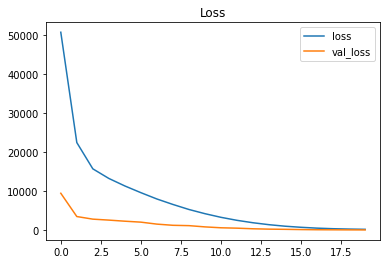

In [8]:
from matplotlib.pyplot import *
plot(h1.epoch,h1.history['loss'])
plot(h1.epoch,h1.history['val_loss'])
title('Loss')
legend(['loss','val_loss'])

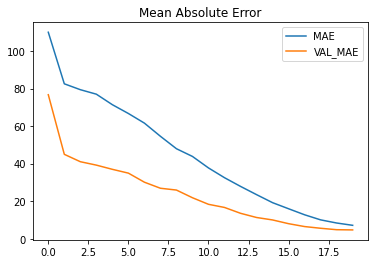

In [9]:
plot(history.epoch,history.history['mean_absolute_error'])
plot(history.epoch,history.history['val_mean_absolute_error'])
title('Mean Absolute Error')
legend(['MAE','VAL_MAE'])

In [29]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [18]:
# Normalization
x2 = x.copy()
print("Before normalization")
for i in range(17):
    xmin = np.min(x[:,i])
    xmax = np.max(x[:,i])
    x2[:,i] = (x[:,i]-xmin)/(xmax-xmin)
    print(xmin,xmax)
print("After normalization")
for i in range(17):
    xmin = np.min(x2[:,i])
    xmax = np.max(x2[:,i])
    print(xmin,xmax)

9.012 5299.456
-40.8732 68.54114
0.0 1419.3517
1.0 388.0
0.0 86.0
0.0 26.0
0.0 89.0
0.0 141.0
0.0 2012.0
0.0 35.0
0.0 30.0
0.0 30.0
0.0 36.0
0.0 1214.34
7.504228 2230.685
-4.204995e-06 7.5173097
0.0 20720.268
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [19]:
x_train2, x_val2, x_test2 = x2[:n1], x2[n1:n2], x2[n2:]

In [27]:
model = Sequential()
model.add(Input(shape=(17,)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['mean_absolute_error'])
h2 = model.fit(x_train2, y_train,
  validation_data=(x_val2,y_val), epochs=20, verbose=0)

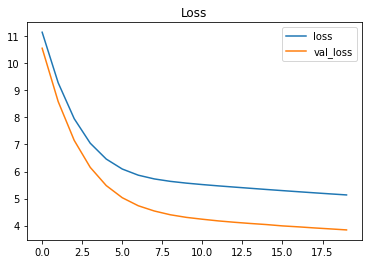

In [21]:
from matplotlib.pyplot import *
plot(h2.epoch,h2.history['loss'])
plot(h2.epoch,h2.history['val_loss'])
title('Loss')
legend(['loss','val_loss'])

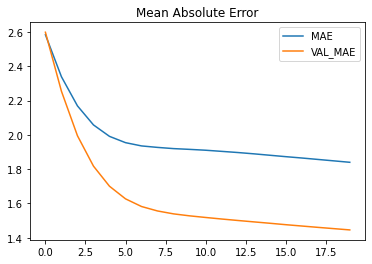

In [22]:
plot(history.epoch,history.history['mean_absolute_error'])
plot(history.epoch,history.history['val_mean_absolute_error'])
title('Mean Absolute Error')
legend(['MAE','VAL_MAE'])

In [23]:
# Standardization
x3 = x.copy()
print("Before Standardization")
for i in range(17):
    mean = np.mean(x[:,i])
    sd = np.std(x[:,i])
    x3[:,i] = (x[:,i]-mean)/sd
    print(mean,sd)
print("After normalization")
for i in range(17):
    mean = np.mean(x3[:,i])
    sd = np.std(x3[:,i])
    print(mean,sd)

Before Standardization
266.66595 184.1698
1.9791672 3.5175617
66.79459 46.52069
17.374674 12.240922
3.486776 3.498028
1.1085955 1.4888984
5.1969547 4.7360377
4.0730314 5.6466417
94.24344 64.745316
1.068323 1.3093611
0.29262674 0.8795545
0.4476057 1.0546144
1.5159286 1.6442515
62.4586 63.345135
108.91259 76.4589
2.3921993 1.0910683
467.3368 546.6043
After normalization
-4.8151858e-08 1.0
-2.1400826e-08 1.0
1.5286304e-09 1.0
4.1273022e-08 1.0
1.1464729e-08 1.0
-3.362987e-08 1.0
-4.433028e-08 1.0
-3.0572609e-09 1.0
-1.8343565e-08 1.0
-5.8087956e-08 0.99999994
-2.4458087e-08 1.0
-1.22290436e-08 1.0000001
2.7515348e-08 1.0
3.0572608e-08 1.0
-5.579501e-08 0.9999999
-4.8916174e-08 1.0
-2.1400826e-08 1.0


In [24]:
x_train3, x_val3, x_test3 = x3[:n1], x3[n1:n2], x3[n2:]

In [25]:
model = Sequential()
model.add(Input(shape=(17,)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['mean_absolute_error'])
h3 = model.fit(x_train3, y_train,
  validation_data=(x_val3,y_val), epochs=20, verbose=0)

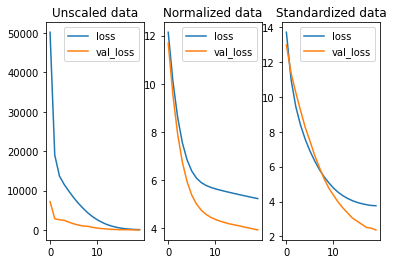

In [32]:
subplot(1,3,1)
plot(h1.epoch,h1.history['loss'])
plot(h1.epoch,h1.history['val_loss'])
title('Unscaled data')
legend(['loss','val_loss'])
subplot(1,3,2)
plot(h1.epoch,h2.history['loss'])
plot(h1.epoch,h2.history['val_loss'])
title('Normalized data')
legend(['loss','val_loss'])
subplot(1,3,3)
plot(h1.epoch,h3.history['loss'])
plot(h1.epoch,h3.history['val_loss'])
title('Standardized data')
legend(['loss','val_loss'])